In [1]:
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout

from local_dataset import load_minst

import matplotlib.pyplot as plt

In [2]:
img_size = 28

In [3]:
x_train, y_train, x_test, y_test = load_minst(img_size=img_size, flatten=False, label_encode=False)

No image flattening.
No label encoding.


In [4]:
# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

In [5]:
# dataset shapes
print('Train data shape:', np.shape(x_train))
print('Test  data shape:', np.shape(x_test))


print('Train label shape:', np.shape(y_train))
print('Test  label shape:', np.shape(y_test))

Train data shape: (60000, 28, 28)
Test  data shape: (10000, 28, 28)
Train label shape: (60000, 1)
Test  label shape: (10000, 1)



----------------
## Model
### Logits:
**The direct output of neurons without no effects of activation function, Not nessecarily between 0 and 1**
<br/>
**Note: The logits is useful for numerical stability specially in last layet of Network**

In [6]:
# Create model architectue

# Deconstruct any available model
model= None

model = Sequential()

model.add(Flatten(input_shape=(img_size, img_size))) 
model.add(Dense(64, activation='relu'))

# leave last layer without activation function, and model out put will be logit
model.add(Dense(10))


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# another model syntax

# Deconstruct any available model
model= None

model = Sequential([
    Flatten(input_shape=(img_size, img_size)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10)
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile Model
model.compile(optimizer='adam',
              # loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              # Use Sparse if labes not encoded. its suitable while classes are to much.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
%%time
# Fit (learn) model
history= model.fit(x=x_train,
                   y=y_train,
                   # batch_size=64,
                   epochs=5,
                   # validation_split=0.2
                  )

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9805 - loss: 0.0640 - val_accuracy: 0.9858 - val_loss: 0.0455
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9811 - loss: 0.0584 - val_accuracy: 0.9845 - val_loss: 0.0485
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9839 - loss: 0.0499 - val_accuracy: 0.9854 - val_loss: 0.0466
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0490 - val_accuracy: 0.9839 - val_loss: 0.0535
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0414 - val_accuracy: 0.9822 - val_loss: 0.0570
CPU times: total: 4.86 s
Wall time: 17.7 s


In [13]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

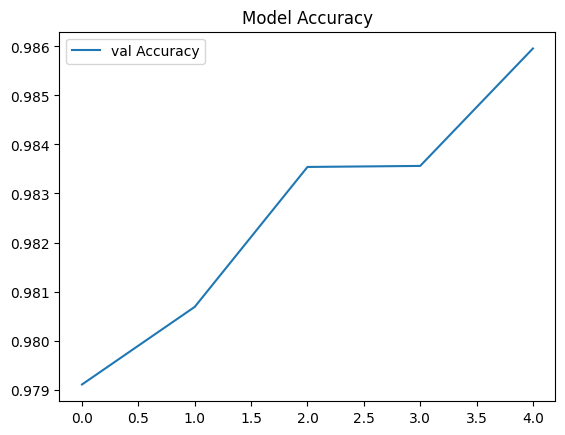

In [20]:
plt.title("Model Accuracy")
# plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val Accuracy', 'train Accuracy'])

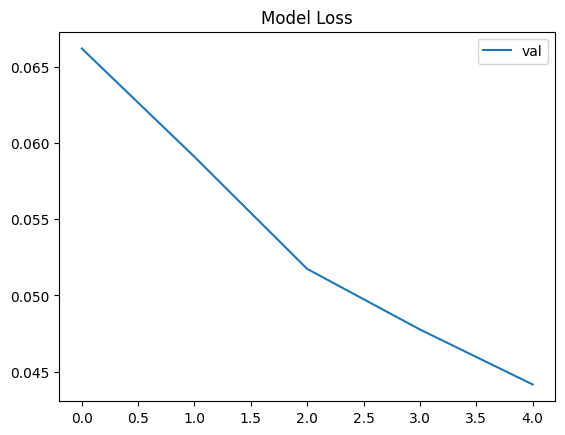

In [21]:
plt.title("Model Loss")
# plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'loss'])

#### Use an element of x test and reshape it to be accepable by model as sample test:

In [39]:
test_sample = x_test[100].reshape(1, 28, 28)
test_label = y_test[100]

In [27]:
test_sample.shape

(1, 28, 28)

#### The ousput is a bunch of numbers (and Not probabilities). Because soft max did not used.

In [30]:
model.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[-3.5925748, -8.471298 , -5.4293985, -7.6880546, -5.006444 ,
        -1.0010649, 11.285802 , -1.2088447, -3.3109796, -9.549573 ]],
      dtype=float32)

#### Create a softmax layer and through model numbers to earn probabilities:

In [31]:
probability_model = Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [34]:
pred = probability_model.predict(test_sample)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[3.4546099e-07, 2.6278275e-09, 5.5039784e-08, 5.7511551e-09,
        8.4016293e-08, 4.6118735e-06, 9.9999082e-01, 3.7466248e-06,
        4.5781948e-07, 8.9393865e-10]], dtype=float32)

In [37]:
print('max probability: ', pred.max())
print('max argument : ', pred.argmax())


max probability:  0.9999908
max argument :  6


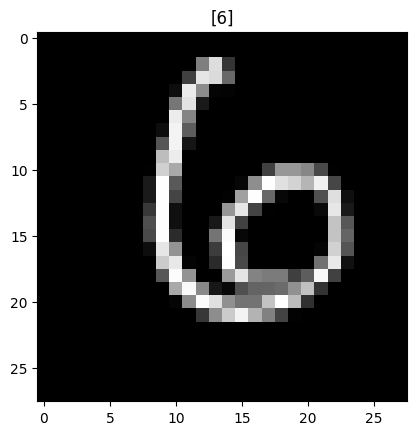

In [45]:
plt.imshow(x_test[100], cmap='gray')
plt.title(y_test[100]);